In [2]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pandas as pd

import imghdr

Make Dataframe

In [5]:
PATH = "../data/unpacked/characters"

characters = os.listdir(PATH)

data = pd.DataFrame(columns=["Character", "Image", "Path"])

for i, character in enumerate(characters):
    path = os.path.join(PATH, character)

    for d in sorted(os.listdir(path)):
        img = cv2.imread(os.path.join(path, d))
        data = data.append({"Character": character, "Image": img, 'Path': os.path.join(path, d)}, ignore_index=True)



C:\Users\TheArk\AppData\Local\Temp\ipykernel_14464\4249178039.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"Character": character, "Image": img, 'Path': os.path.join(path, d)}, ignore_index=True)
C:\Users\TheArk\AppData\Local\Temp\ipykernel_14464\4249178039.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"Character": character, "Image": img, 'Path': os.path.join(path, d)}, ignore_index=True)
C:\Users\TheArk\AppData\Local\Temp\ipykernel_14464\4249178039.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append({"Character": character, "Image": img, 'Path': os.path.join(path, d)}, ignore_index=True)
C:\Users\TheArk\AppData\Local\Temp\ipykernel_14464\4249178039

Store the data

In [6]:
%store data

Stored 'data' (DataFrame)


In [7]:
data['Path'].head

<bound method NDFrame.head of 0       ../data/unpacked/characters\Alef\navis-QIrug-Q...
1       ../data/unpacked/characters\Alef\navis-QIrug-Q...
2       ../data/unpacked/characters\Alef\navis-QIrug-Q...
3       ../data/unpacked/characters\Alef\navis-QIrug-Q...
4       ../data/unpacked/characters\Alef\navis-QIrug-Q...
                              ...                        
5532    ../data/unpacked/characters\Zayin\navis-QIrug-...
5533    ../data/unpacked/characters\Zayin\navis-QIrug-...
5534    ../data/unpacked/characters\Zayin\navis-QIrug-...
5535    ../data/unpacked/characters\Zayin\navis-QIrug-...
5536    ../data/unpacked/characters\Zayin\navis-QIrug-...
Name: Path, Length: 5537, dtype: object>

In [8]:
data["Character"].value_counts()

Alef            300
Mem             300
Tsadi-medial    300
Tet             300
Taw             300
Shin            300
Samekh          300
Ayin            300
Mem-medial      300
Nun-medial      300
Het             300
He              300
Bet             300
Gimel           300
Lamed           294
Qof             265
Kaf             193
Nun-final       130
Waw             116
Dalet            91
Resh             78
Tsadi-final      73
Pe               37
Yod              23
Pe-final         15
Zayin            12
Kaf-final        10
Name: Character, dtype: int64

Check duplicates 

In [9]:
# https://pyimagesearch.com/2020/04/20/detect-and-remove-duplicate-images-from-a-dataset-for-deep-learning/
def dhash(image, hashSize=8):
	# convert the image to grayscale and resize the grayscale image,
	# adding a single column (width) so we can compute the horizontal
	# gradient
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	resized = cv2.resize(gray, (hashSize + 1, hashSize))
	# compute the (relative) horizontal gradient between adjacent
	# column pixels
	diff = resized[:, 1:] > resized[:, :-1]
	# convert the difference image to a hash and return it
	return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])


In [10]:
hashes = {}
for imgPath in data['Path']:
    img = cv2.imread(imgPath)
    hash = dhash(img)
    
    p = hashes.get(hash, [])
    p.append(imgPath)
    hashes[hash] = p


In [18]:
hashFrame = pd.DataFrame(columns=["Character", "Path", "Hash"])	
for imgPath in data['Path']:
    img = cv2.imread(imgPath)
    hash = dhash(img)
    
    hashFrame = hashFrame.append({"Character": data["Character"][data["Path"] == imgPath].values[0], "Path": imgPath, "Hash": hash}, ignore_index=True)

C:\Users\TheArk\AppData\Local\Temp\ipykernel_14464\3052733428.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hashFrame = hashFrame.append({"Character": data["Character"][data["Path"] == imgPath].values[0], "Path": imgPath, "Hash": hash}, ignore_index=True)
C:\Users\TheArk\AppData\Local\Temp\ipykernel_14464\3052733428.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hashFrame = hashFrame.append({"Character": data["Character"][data["Path"] == imgPath].values[0], "Path": imgPath, "Hash": hash}, ignore_index=True)
C:\Users\TheArk\AppData\Local\Temp\ipykernel_14464\3052733428.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hashFrame = hashFrame.append({"Character": data["Character"][data["Path"] == imgPath].values[0]

In [19]:
hashFrame.head()

Character                                               Path  \
0      Alef  ../data/unpacked/characters\Alef\navis-QIrug-Q...   
1      Alef  ../data/unpacked/characters\Alef\navis-QIrug-Q...   
2      Alef  ../data/unpacked/characters\Alef\navis-QIrug-Q...   
3      Alef  ../data/unpacked/characters\Alef\navis-QIrug-Q...   
4      Alef  ../data/unpacked/characters\Alef\navis-QIrug-Q...   

                   Hash  
0  13890863083046092864  
1  13890863083046092864  
2   9262849729266450435  
3   9710957925329010688  
4     72761858091681984

In [25]:
duplicates = pd.DataFrame(columns=["Character", "Path", "Hash"])

for i, row in hashFrame.iterrows():
    if len(hashes[row["Hash"]]) > 1:

        
        for imgPath in hashes[row["Hash"]]:
            img = cv2.imread(imgPath)
            img = cv2.resize(img, (150, 150))
            
            duplicates.append({"Character": data["Character"][data["Path"] == imgPath].values[0], "Path": imgPath, "Hash": hash}, ignore_index=True)

            
            # duplicates = duplicates.append({"Character": data["Character"][data["Path"] == imgPath].values[0], "Path": imgPath, "Hash": hash}, ignore_in?dex=True)

C:\Users\TheArk\AppData\Local\Temp\ipykernel_14464\4105672513.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duplicates.append({"Character": data["Character"][data["Path"] == imgPath].values[0], "Path": imgPath, "Hash": hash}, ignore_index=True)
C:\Users\TheArk\AppData\Local\Temp\ipykernel_14464\4105672513.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duplicates.append({"Character": data["Character"][data["Path"] == imgPath].values[0], "Path": imgPath, "Hash": hash}, ignore_index=True)
C:\Users\TheArk\AppData\Local\Temp\ipykernel_14464\4105672513.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  duplicates.append({"Character": data["Character"][data["Path"] == imgPath].values[0], "Path": imgPath, "Hash": has

In [26]:
duplicates.head()

Empty DataFrame
Columns: [Character, Path, Hash]
Index: []

In [17]:
for (h, hashedPaths) in hashes.items():
	# check to see if there is more than one image with the same hash
	if len(hashedPaths) > 1:
		# check to see if this is a dry run
		# if args["remove"] <= 0:
			# initialize a montage to store all images with the same
			# hash
			montage = None
			duplicates = pd.DataFrame(columns=["Image", "Path"])
			# loop over all image paths with the same hash
			for p in hashedPaths:
				# load the input image and resize it to a fixed width
				# and heightG
				image = cv2.imread(p)
				image = cv2.resize(image, (150, 150))
				# if our montage is None, initialize it
				if montage is None:
					montage = image
				# otherwise, horizontally stack the images
				else:
					montage = np.hstack([montage, image])
			# show the montage for the hash
			print("[INFO] hash: {}".format(h))
			# plt.show(montage)
			cv2.imshow("Montage", montage)
			cv2.waitKey(0)
			cv2.destroyAllWindows()
	

[INFO] hash: 13890863083046092864
[INFO] hash: 36739383265626240
[INFO] hash: 36174225689577476
[INFO] hash: 37295712521719808
[INFO] hash: 20416284894743616
[INFO] hash: 38426560235063296
[INFO] hash: 4649619464874137664
[INFO] hash: 37863609204787200
[INFO] hash: 37370340263346176
[INFO] hash: 4667001092294350848
[INFO] hash: 36456234590181504
[INFO] hash: 36457892182264960
[INFO] hash: 37865818293852168
[INFO] hash: 36174210661384192
[INFO] hash: 14322714105268437120
[INFO] hash: 9261307665412835332
[INFO] hash: 55275061546344448
[INFO] hash: 4666228685375310912
[INFO] hash: 37370614742894848
[INFO] hash: 6861779347474432
[INFO] hash: 2305403162497048
[INFO] hash: 6861504469552128
[INFO] hash: 2269806473547848
[INFO] hash: 75559265850936324
[INFO] hash: 583269343854890626
[INFO] hash: 6790862055179776
[INFO] hash: 3483804883258372
[INFO] hash: 148691948176179329
[INFO] hash: 4539061168015360
[INFO] hash: 147510894656783362
[INFO] hash: 6967057586095104
[INFO] hash: 14754649129566521

In [28]:
img.shape

(42, 35)

In [ ]:
path = "../data/unpacked/characters"
f = np.array([])
out = np.array([]) 
for root, dirs, files in os.walk(path):

    print(f"root: {root} en length {root} \n dirs: {dirs} \n files: {files}")
print(out)

In [6]:
PATH = "../data/unpacked/characters/Alef/navis-QIrug-Qumran_extr09_0001-line-008-y1=400-y2=515-zone-HUMAN-x=1650-y=0049-w=0035-h=0042-ybas=0027-nink=631-segm=COCOS5cocos.pgm"

path = "../data/unpacked/characters"

filepath = os.path.join(path,"/Alef/navis-QIrug-Qumran_extr09_0001-line-008-y1=400-y2=515-zone-HUMAN-x=1650-y=0049-w=0035-h=0042-ybas=0027-nink=631-segm=COCOS5cocos.pgm") 
img = cv2.imread(PATH)
print(PATH)
type(img)
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows();

# cv2.destroyAllWindows()

../data/unpacked/characters/Alef/navis-QIrug-Qumran_extr09_0001-line-008-y1=400-y2=515-zone-HUMAN-x=1650-y=0049-w=0035-h=0042-ybas=0027-nink=631-segm=COCOS5cocos.pgm


In [41]:
from __future__ import print_function
import cv2 as cv
import numpy as np
import argparse
from matplotlib import pyplot as plt

src = None
erosion_size = 1
dilation_size = 1
max_elem = 2


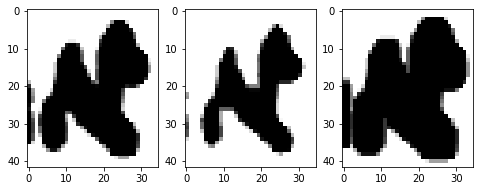

In [42]:
# if src is None:
#     print('Could not open or find the image: ', image)
#     exit(0)
PATH = "../data/unpacked/characters/Alef/navis-QIrug-Qumran_extr09_0001-line-008-y1=400-y2=515-zone-HUMAN-x=1650-y=0049-w=0035-h=0042-ybas=0027-nink=631-segm=COCOS5cocos.pgm"

img = cv.imread(PATH)
fig = plt.figure(figsize=(8, 8))

# erosion
erose = erosion(img, erosion_size,1)
# dialate the image
dilate = dilation(img, erosion_size,1)
fig.add_subplot(2,3,1)
plt.imshow(img)
fig.add_subplot(2,3,2)
plt.imshow(dilate)
fig.add_subplot(2,3,3)
plt.imshow(erose)

plt.show()


In [39]:
# erode the image
def erosion(image: np.ndarray, kernel_size: int, iterations: int)-> np.ndarray:
    elements = cv.getStructuringElement(cv.MORPH_RECT, (2 * erosion_size + 1, 2 * erosion_size + 1), (erosion_size, erosion_size))
    
    return cv.erode(image, elements, iterations=iterations)

# dilate the image
def dilation(image: np.ndarray, kernel_size: int, iterations: int)-> np.ndarray:
    elements = cv.getStructuringElement(cv.MORPH_RECT, (2 * dilation_size + 1, 2 * dilation_size + 1), (dilation_size, dilation_size))
    
    return cv.dilate(image, elements, iterations=iterations)